<a href="https://colab.research.google.com/github/Y-ngenzi/Predator-and-prey-model-to-control-the-pests-by-feeding-the-predator-/blob/main/Predatorandpreymodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statment 
## Is it effective to use predator to kill pests instead of using pesticides?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

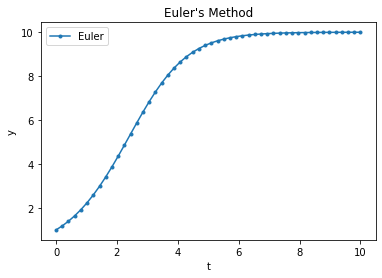

In [ ]:
# starting with a simple model of exponential growth of predator and prey
def f(t,y):
  alpha=1
  k=10
  return alpha*y*(1-y/k)   # returns derivative of y

y0 = 20 # if we start with this population
sol = solve_ivp(f, [0,5],[y0])
# The results are in the t and y variables
t_ivp = sol.t
y_ivp = sol.y[0]  # y is always a 2D array!

def euler(f,t,y0):
  y = np.zeros_like(t)
  y[0] = y0

  for i in range(len(t)-1):
    y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])

  return y



t = np.linspace(0, 10, num=50)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,10,200)
k=1
ysol = np.exp(k*tsol)
plt.plot(t,y,'.-',label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.show()

# I expected that the pests and the predator will grow exponentially and that is what I saw and now I am going to analyse what happens when these pests encounters the predators. 

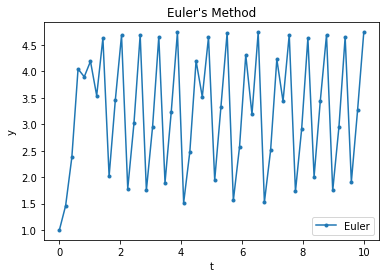

In [ ]:
# allee effect

def f(t,y):
  r=1
  k=4
  A=1/k
  return r*y*(1-y/k)*(y/A-1)   # returns derivative of y

y0 = 20
sol = solve_ivp(f, [0,5],[y0])
# The results are in the t and y variables
t_ivp = sol.t
y_ivp = sol.y[0]  # y is always a 2D array!

def euler(f,t,y0):
  y = np.zeros_like(t)
  y[0] = y0

  for i in range(len(t)-1):
    y[i+1] = y[i] + (t[i+1]-t[i])*f(t[i],y[i])

  return y



t = np.linspace(0, 10, num=50)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,10,200)
k=1
ysol = np.exp(k*tsol)
plt.plot(t,y,'.-',label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.show()

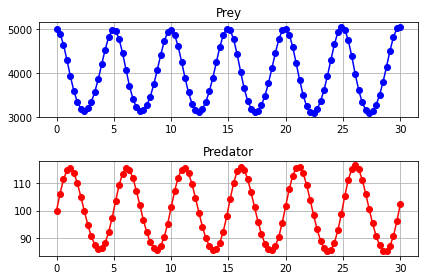

In [ ]:
def f(t,y):
  a0 = 2
  d0 = 0.02
  a1 = 0.0002
  d1 = 0.8
  y0 = y[0]
  y1 = y[1]
  return [a0*y0 - d0*y0*y1, a1*y0*y1 - d1*y1] 
t = np.linspace(0,30,100)
tf = 30
prey0 = 5000
pred0 = 100
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator')
plt.grid()
plt.tight_layout()
plt.show()

# I expected this kind of movment between the predator and the prey which is when the predator are higher the prey are lower in natural world. This happens when we consider only natural process where the pests are  not being decreases by anything but lets look at when other parameters are introduced. 


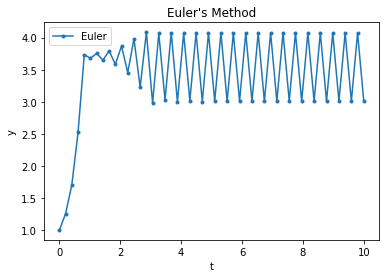

In [ ]:
# what happens to the pest when we have allee effect 
def f(t,y):
  gama=4
  theta=1/gama
  h=1
  return y*(1-y/gama)*(y/theta-1)-h*y   # returns derivative of y

y0 = 20
sol = solve_ivp(f, [0,5],[y0])
# The results are in the t and y variables
t_ivp = sol.t
y_ivp = sol.y[0]  # y is always a 2D array!

t = np.linspace(0, 10, num=50)
y0 = 1
y = euler(f,t,y0)

# Exact
tsol = np.linspace(0,5,200)
k=1
ysol = np.exp(k*tsol)
plt.plot(t,y,'.-',label='Euler')
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler\'s Method')
plt.show()

## This is  what I expected because when we are calling the pests they tend to decrecreaand theis may reach zero if it is done extensively

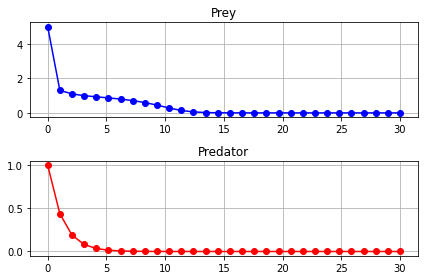

In [ ]:
# Happens when the predator are added in the model of the prey 
def f(t,y):
  gama=1
  theta=1
  h=0.05
  zetha=1
  alpha=1.3
  b=0.3
  q=0.2
  y0 = y[0]
  y1 = y[1]
  return [y0*(1-y0/gama)*(y0/theta-1)-h*y0-((y0*y1)/(1+y0+alpha*zetha)), ((b*(y0+zetha)*y1)/(1+y0+alpha*zetha))-(gama*y1)   ] 
t = np.linspace(0,30,30)
tf = 30
prey0 = 5
pred0 = 1
sol = solve_ivp(f, [0,tf],[prey0, pred0],t_eval=t )
t = sol.t
y = sol.y[0]
yp = sol.y[1]

plt.subplot(2,1,1)
plt.plot(t,y,'bo-', label='y')
plt.title('Prey')
plt.grid()
plt.subplot(2,1,2)
plt.plot(t,yp,'ro-', label='dy')
plt.title('Predator')
plt.grid()
plt.tight_layout()
plt.show()

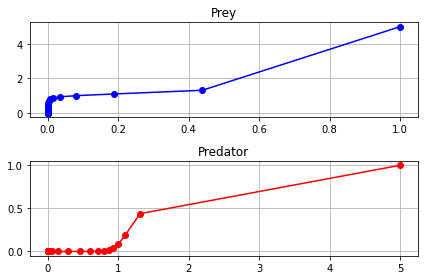

In [ ]:
plt.subplot(2,1,1)
plt.plot(yp,y,'bo-', label='y')
plt.title('Prey')
plt.grid()
plt.subplot(2,1,2)
plt.plot(y,yp,'ro-', label='dy')
plt.title('Predator')
plt.grid()
plt.tight_layout()
plt.show()